## Customer Segmentation

##### Imported relevant libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
import warnings

warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [6]:
df.shape

(2000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


## Data Preprocessing

In [8]:
##checked for missing values
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [9]:
#checked the percentage of missing values
df.isnull().mean()*100

CustomerID                0.00
Gender                    0.00
Age                       0.00
Annual Income ($)         0.00
Spending Score (1-100)    0.00
Profession                1.75
Work Experience           0.00
Family Size               0.00
dtype: float64

In [10]:
##replace missing professions with 'no info'
df["Profession"].fillna("No Info", inplace=True)

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [13]:
##checked for duplicates
df.duplicated().sum()

0

In [14]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [15]:
#checked for standaradization issues
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [16]:
df['Gender'].value_counts()

Gender
Female    1186
Male       814
Name: count, dtype: int64

In [17]:
df['Profession'].value_counts()

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
No Info           35
Name: count, dtype: int64

In [18]:
#categorized Age
def categorize_age(age):
    if age < 13:
        return 'Child'
    elif 13 <= age <= 19:
        return 'Teenager'
    elif 20 <= age <= 64:
        return 'Adult'
    else:
        return 'Senior'

df["Age_category"]=df["Age"].apply(categorize_age)



In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_category
0,1,Male,19,15000,39,Healthcare,1,4,Teenager
1,2,Male,21,35000,81,Engineer,3,3,Adult
2,3,Female,20,86000,6,Engineer,1,1,Adult
3,4,Female,23,59000,77,Lawyer,0,2,Adult
4,5,Female,31,38000,40,Entertainment,2,6,Adult


In [20]:
#categorized annual income
df['Annual Income ($)'].max()

189974

In [21]:
def categorize_income(income):
    if income < 30000:
        return 'Low Income'
    elif 30000 <= income < 100000:
        return 'Middle Income'
    else:
        return 'High Income'

df["Income_category"]=df["Annual Income ($)"].apply(categorize_income)


In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_category,Income_category
0,1,Male,19,15000,39,Healthcare,1,4,Teenager,Low Income
1,2,Male,21,35000,81,Engineer,3,3,Adult,Middle Income
2,3,Female,20,86000,6,Engineer,1,1,Adult,Middle Income
3,4,Female,23,59000,77,Lawyer,0,2,Adult,Middle Income
4,5,Female,31,38000,40,Entertainment,2,6,Adult,Middle Income


In [23]:
#categorised work experience
df['Work Experience'].max()

17

In [24]:
def categorize_experience(years_of_experience):
    if years_of_experience <= 5:
        return '0-5 years'
    elif 6 <= years_of_experience <= 10:
        return '6-10 years'
    elif 11 <= years_of_experience <= 15:
        return '11-15 years'
    else:
        return '16+ years'

df["Experience_category"]=df["Work Experience"].apply(categorize_experience)

In [25]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_category,Income_category,Experience_category
0,1,Male,19,15000,39,Healthcare,1,4,Teenager,Low Income,0-5 years
1,2,Male,21,35000,81,Engineer,3,3,Adult,Middle Income,0-5 years
2,3,Female,20,86000,6,Engineer,1,1,Adult,Middle Income,0-5 years
3,4,Female,23,59000,77,Lawyer,0,2,Adult,Middle Income,0-5 years
4,5,Female,31,38000,40,Entertainment,2,6,Adult,Middle Income,0-5 years


In [26]:
df['Age_category'].value_counts()

Age_category
Adult       958
Senior      662
Child       230
Teenager    150
Name: count, dtype: int64

In [27]:
df['Income_category'].value_counts()

Income_category
High Income      1118
Middle Income     805
Low Income         77
Name: count, dtype: int64

In [28]:
df['Experience_category'].value_counts()

Experience_category
0-5 years      1257
6-10 years      656
11-15 years      77
16+ years        10
Name: count, dtype: int64

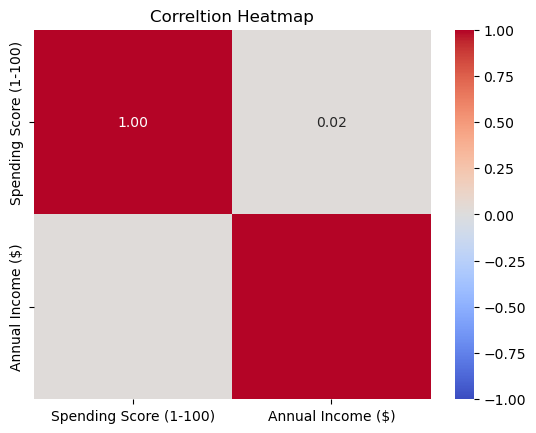

In [29]:
#checked for correlation between spending score and annual income
corr_matrix = df[['Spending Score (1-100)', 'Annual Income ($)']].corr()
#heatmap
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm',fmt='.2f',vmin=-1,vmax=1)
plt.title('Correltion Heatmap')
plt.show()


#### There is no significant relationship between annual income and spending score

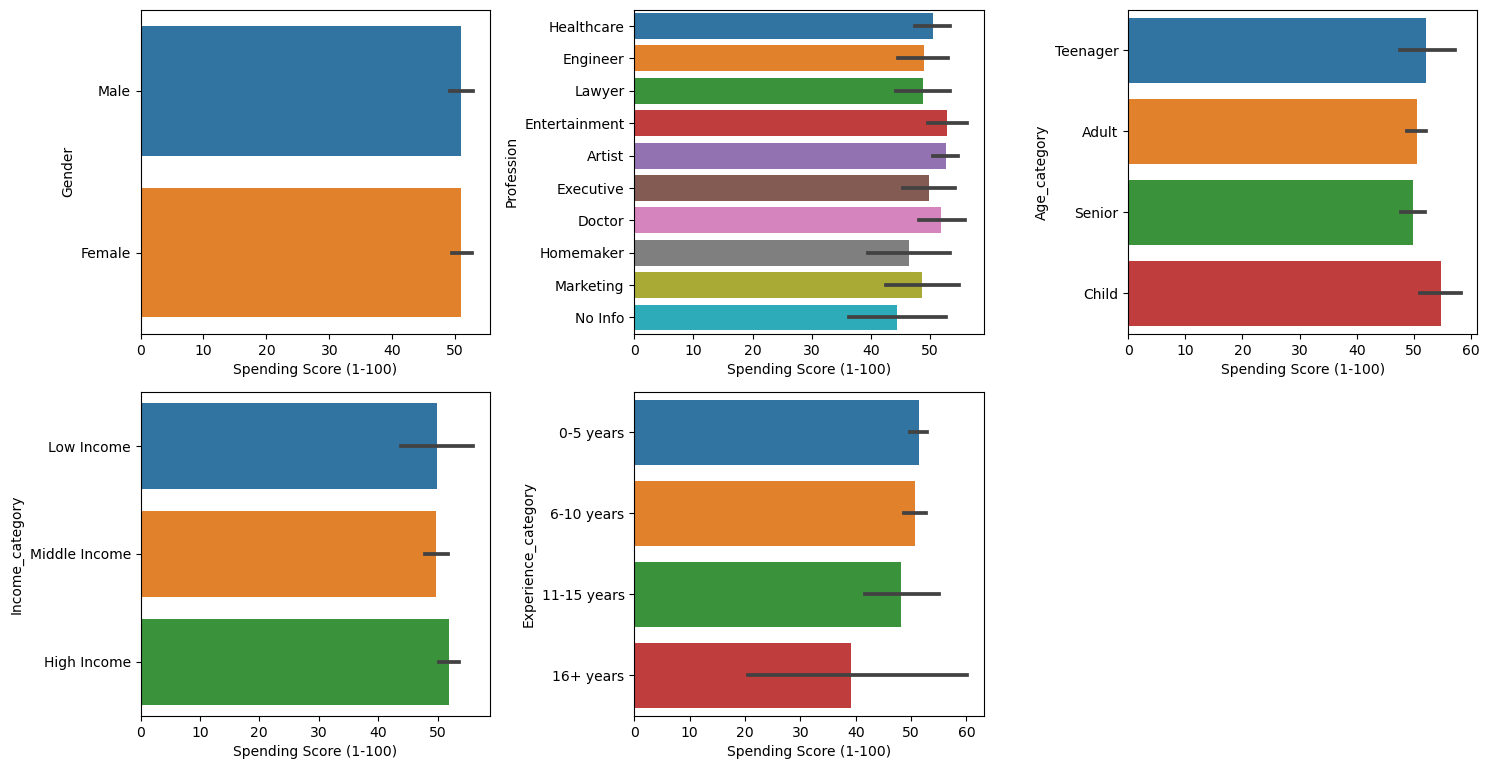

In [121]:
# Set up the plot with appropriate size
plt.figure(figsize=(15, 15))  # Adjusted to better fit the subplots

# Loop through categorical columns
for i, col in enumerate(df.select_dtypes(include=["object"]).columns):
    ax = plt.subplot(4, 3, i + 1) 
    sns.barplot(data=df, x='Spending Score (1-100)', y=col, ax=ax) 

plt.tight_layout()  
plt.show()


###### The bar plots reveal that younger demographics (Teenagers and Children), females, and individuals in creative professions 
###### with higher income tend to have higher spending scores.

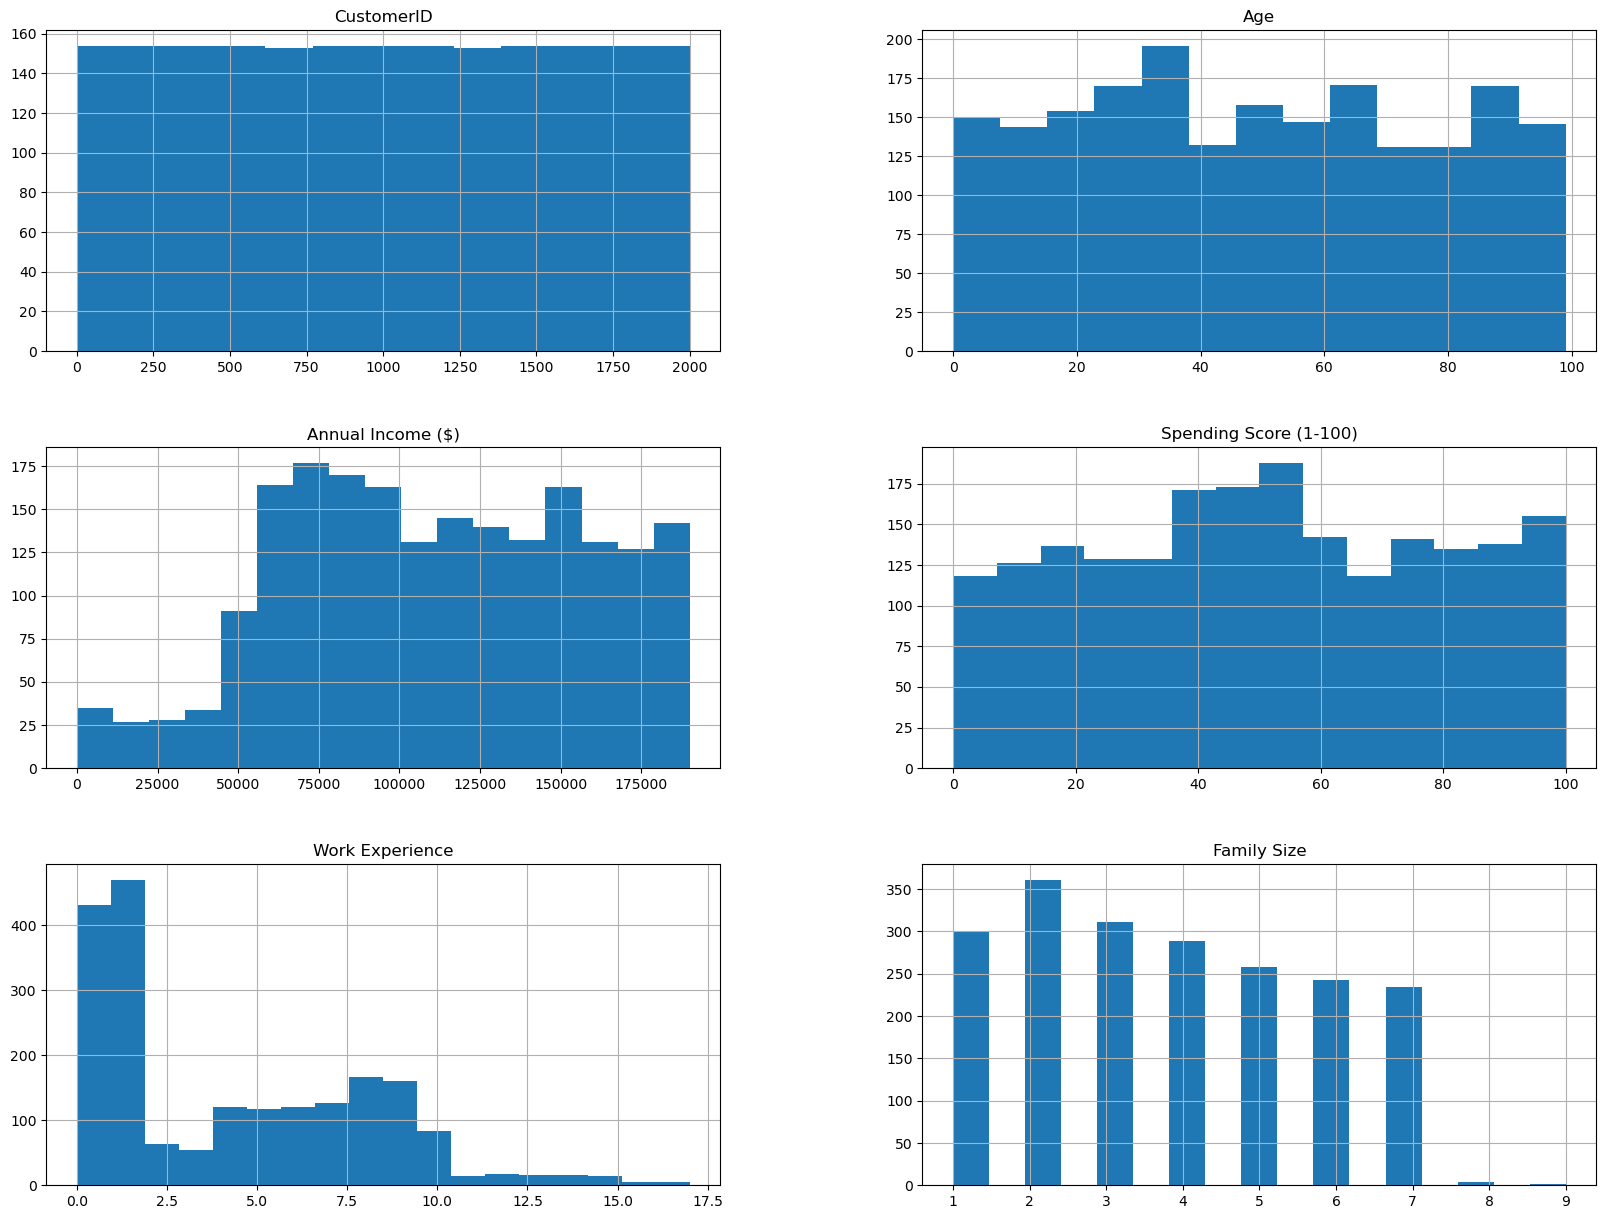

In [31]:
##Checked for distribution  of Features
df.hist(figsize=(20, 15), bins="auto")
plt.show()

In [40]:
# Using IQR (Interquartile Range) to detect outliers
columns = ['Annual Income ($)', 'Spending Score (1-100)', 'Age', 'Work Experience', 'Family Size']
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = ((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).sum()

# Print the number of outliers for each column
print(outliers)


Annual Income ($)         0
Spending Score (1-100)    0
Age                       0
Work Experience           5
Family Size               0
dtype: int64


In [41]:
df['Work Experience'].value_counts()

Work Experience
1     470
0     431
8     166
9     160
7     126
4     121
6     120
5     117
10     84
2      63
3      55
12     17
13     16
14     16
11     14
15     14
16      5
17      5
Name: count, dtype: int64

In [ ]:
# export the cleaned dataset
df.to_csv('clean_customer.csv', index=False)

In [123]:
##dropped columns that are not needed for the clustering
df=df.drop(columns=['Gender','Profession','Age_category', 'Income_category',
       'Experience_category','Work Experience', 'Family Size','Age'])

In [124]:
#feature scaling
scaler= StandardScaler()
scaleddata=scaler.fit_transform(df[['Annual Income ($)','Spending Score (1-100)']])

In [125]:
#checked scaled data
scaleddata[:5]

array([[-2.09350095, -0.42833854],
       [-1.65613312,  1.07554599],
       [-0.54084515, -1.6099621 ],
       [-1.13129172,  0.93231889],
       [-1.59052794, -0.39253176]])

In [126]:
#checked scaled data
scaleddata[:5]

array([[-2.09350095, -0.42833854],
       [-1.65613312,  1.07554599],
       [-0.54084515, -1.6099621 ],
       [-1.13129172,  0.93231889],
       [-1.59052794, -0.39253176]])

## Elbow method

#### The elbow method helps identify the optimal number of clusters by evaluating the sum of squared distances (inertia).

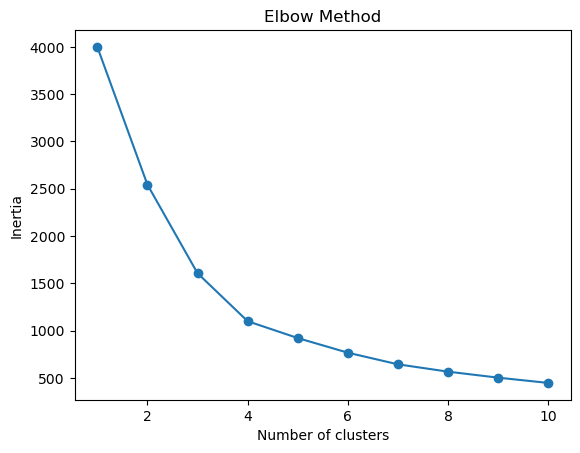

In [127]:
# Using the Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaleddata)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Silhouette score

#### Calculated the silhouette score for different numbers of clusters to complement the elbow method.

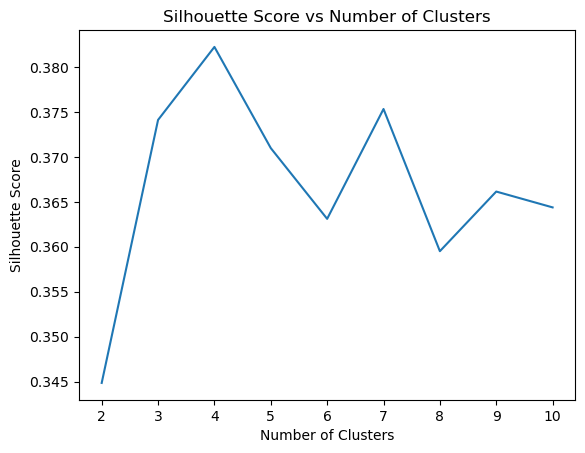

In [128]:
sil_scores = []
for k in range(2, 11):  # Start from 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaleddata)
    sil_scores.append(silhouette_score(scaleddata, kmeans.labels_))

# Plot the Silhouette Scores for each number of clusters
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### The silhouette score peaks at k = 4, suggesting that 4 clusters provide the best separation and structure in the data.
#### The optimal number of clusters is likely 4, as it achieves the highest silhouette score. 
#### This suggests that the data can be best grouped into 4 distinct clusters, balancing separation and cohesion.

## Kmeans clustering

In [129]:
# Apply KMeans with the chosen number of clusters (4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaleddata)
df.head()

,CustomerID,Annual Income ($),Spending Score (1-100),Cluster
0,1,15000,39,0
1,2,35000,81,2
2,3,86000,6,0
3,4,59000,77,2
4,5,38000,40,0


## Analysed cluster centroids
##### Centroids provide insights into the characteristics of each cluster.

In [130]:
# Inverse transform the centroids to original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

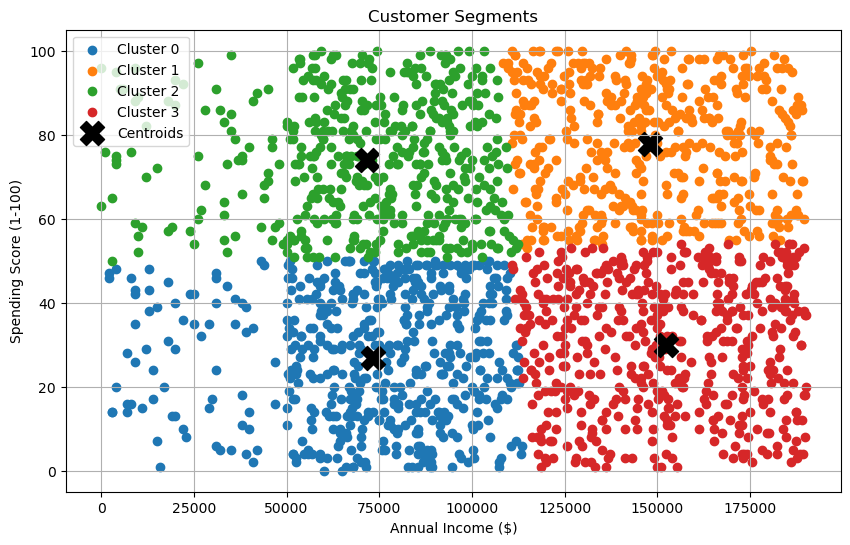

In [151]:
# Plot settings
plt.figure(figsize=(10, 6))

# Loop through clusters
for cluster in range(df['Cluster'].nunique()):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income ($)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='X', label='Centroids')

# Add plot labels and grid
plt.title('Customer Segments')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [132]:
# Group by clusters and calculate the mean for each feature
clustersummary = df.groupby('Cluster').mean()

In [133]:
clustersummary

,CustomerID,Annual Income ($),Spending Score (1-100)
Cluster,,,
0,878.398131,73230.985047,26.900935
1,1164.792735,148042.489316,77.850427
2,829.334025,71671.199170,74.014523
3,1138.242718,152341.093204,29.949515


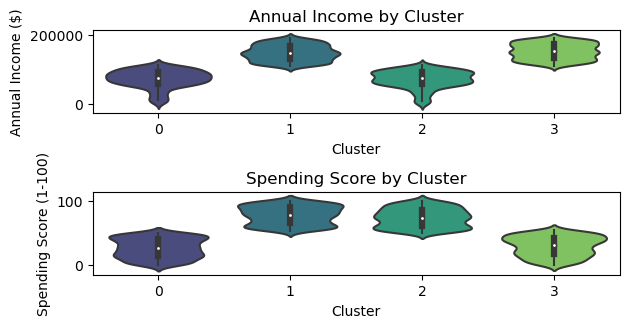

In [134]:
cluster_colors = sns.color_palette("viridis", n_colors=len(df['Cluster'].unique()))
# Plot annual income by Cluster
plt.subplot(3, 1, 2)
sns.violinplot(x='Cluster', y='Annual Income ($)', data=df, palette=cluster_colors)
plt.title('Annual Income by Cluster')
plt.ylabel('Annual Income ($)')

# Plot spending score by Cluster
plt.subplot(3, 1, 3)
sns.violinplot(x='Cluster', y='Spending Score (1-100)', data=df, palette=cluster_colors)
plt.title('Spending Score by Cluster')
plt.ylabel('Spending Score (1-100)')

# Adjust layout
plt.tight_layout()
plt.show()


### Insights:


#### Cluster 0: Customers with low income and low spending habits.
#### Cluster 1: Customers with medium income and medium-to-high spending scores.
#### Cluster 2: Customers with high income and high spending habits (potential high-value customers).
#### Cluster 3: Customers with high income but medium spending scores (potential to increase engagement).

In [161]:
Cluster_Labels = pd.DataFrame({
    'Cluster': [0,1, 2, 3],
    'ClusterLabels': ["Savers", "Spenders", "VIPs", "Planners"]
})


In [163]:
Cluster_Labels

,Cluster,ClusterLabels
0,0,Savers
1,1,Spenders
2,2,VIPs
3,3,Planners


In [164]:
### merged cluster labels with dataframe
df= pd.merge(df, Cluster_Labels, left_on='Cluster', right_on='Cluster', how='inner')

In [171]:
df

,CustomerID,Annual Income ($),Spending Score (1-100),Cluster,ClusterLabels
0,1,15000,39,0,Savers
1,3,86000,6,0,Savers
2,5,38000,40,0,Savers
3,7,31000,6,0,Savers
4,9,97000,3,0,Savers
...,...,...,...,...,...
1995,1983,137094,68,1,Spenders
1996,1989,118944,77,1,Spenders
1997,1991,166983,69,1,Spenders
1998,1992,129444,96,1,Spenders


In [172]:
df['Cluster'].value_counts()

Cluster
0    535
3    515
2    482
1    468
Name: count, dtype: int64

In [176]:
df['ClusterLabels'].value_counts()

ClusterLabels
Savers      535
Planners    515
VIPs        482
Spenders    468
Name: count, dtype: int64

## marketing recommendations

#### Cluster 0	(Savers):	Focus on discounts, coupons, and budget-friendly deals. Highlight value-for-money products or services.
#### Cluster 1	(Spenders):	Engage with loyalty programs, seasonal offers, and personalized discounts. Use targeted promotions.
#### Cluster 2	(VIPs):	Provide exclusive, premium services and VIP experiences. Offer personalized recommendations and luxury perks.
#### Cluster 3	(Planners):	Showcase practical and reliable products. Use subtle upselling strategies and financial incentives like cashback.

In [177]:
# export the cleaned dataset
df.to_csv('customerz_cluster.csv', index=False)